        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

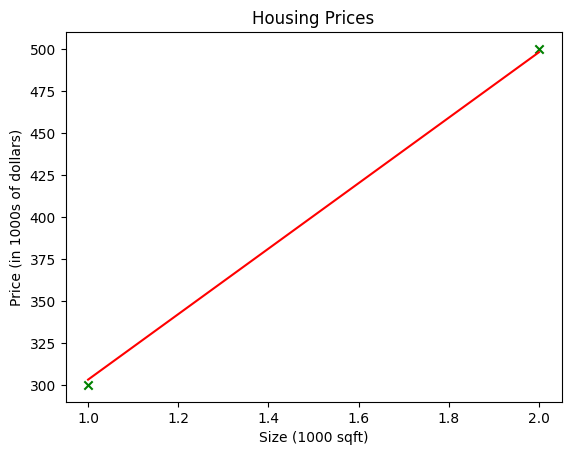

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_set = pd.read_csv('Downloads/Housing.csv')
print(data_set)

# x = np.array(data_set.loc[:, 'area'].copy(), dtype = "float64")
# y = np.array(data_set.loc[:, 'price'].copy(), dtype = "float64")

x = [1, 2]
y = [300, 500]

# for i in range(0, len(y)):
#     y[i] //= 1000

# print(x, y)

def f(x, w, b):
    return x * w + b
    
def compute_model_output(x, w, b):
    m = len(x)
    y = []
    for i in range (0, m):
        y.append(f(x[i], w, b))
    return y
    
def cost(x, y, w, b):
    m = len(x)
    res = 0
    for i in range (0, m):
        res += (f(x[i], w, b) - y[i])**2;
    res /= 2 * m
    return res

def dw_cost(x, y, w, b):
    m = len(y)
    res = 0
    for i in range (0, m):
        res += (f(x[i], w, b) - y[i]) * x[i]
    res /= m
    return res
    
def db_cost(x, y, w, b):
    m = len(y)
    res = 0
    for i in range (0, m):
        res += (f(x[i], w, b) - y[i]);
    res /= m
    return res
    
w = np.float64(0)
b = np.float64(0)
alpha = np.float64(1.0e-3)
iteration = 0
while iteration < 10000 and cost(x, y, w, b) > 0.00000001:
    nw = w - alpha * dw_cost(x, y, w, b)
    nb = b - alpha * db_cost(x, y, w, b)
    w = nw
    b = nb
    iteration += 1
print(w, b)
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')

model_y = compute_model_output(x, w, b)
print(cost(x, y, w, b))
plt.scatter(x, y, marker = "x", c = "g")
plt.plot(x, model_y, c = "r")

In [3]:
x = float(input("Enter house size"))
print(f(x, w, b))

plt.show()

Enter house size 1.5


400.60080570735306
